# 1. Long-term VLM calculation
***code prepared by Alessio Rovere, MARUM, University of Bremen, DE. Contact: arovere@marum.de<br>
Date: 27/02/2020***

This simple script calculates long-term vertical land motion (VLM) rates from three inputs: 

1. An eustatic sea level (ESL) estimate for a given time period (interval, with max-min)
2. The time interval (Time) (interval, max-min)
3. GIA corrections for the same time period (mean and standard deviation)
4. Observed Relative sea level (RSL) for the same period (mean and standard deviation)

With these three inputs, the script calculates long-term uplift rates with the following rationale:

1. The ESL estimate and Time are sampled randomly, with no assumptions on its probability distribution
2. GIA and RSL are sampled as normally distributed
3. The calculation of the rate is iterated 1.000.000 times with the formula (RSL − GIA − ESL)/Time
4. A histogram plot is provided with percentile bounds

## General comments
Considering ESL and Time as uniformly distributed is not optimal. Please suggest improvements and bugs to arovere@marum.de

In [20]:
#Inputs (change here)

#Max and min ESL [m]
ESLmin=10.6
ESLmax=28.3

#GIA [m]
muGIA=3.6
sdGIA=1.2

#RSL [m]
muRSL=35.1
sdRSL=2.2

#Time [Ma]
maxTime=4.87
minTime=4.28

In [21]:
# Calculations
import numpy as np
import random

Rate=[]
val = np.linspace(0, 1000000, num=1000001)

#Creates a matrix randomly sampling the inputs
for x in val:
 ESL=random.uniform(ESLmin, ESLmax)
 Time=random.uniform(maxTime, minTime)
 RSL=np.random.normal(muRSL, sdRSL, 1)
 GIA=np.random.normal(muGIA, sdGIA, 1)
 Rate.append((RSL-GIA-ESL)/Time)

,10th,33rd,50th,66th,90th
Rate (m/Ma),1.0,2.0,2.6,3.3,4.3


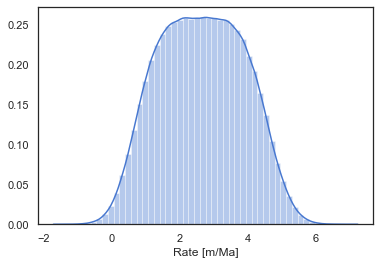

In [22]:
#Plots

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", palette="muted", color_codes=True)
ax = sns.distplot(Rate)
ax.set(xlabel='Rate [m/Ma]')

import pandas as pd
Perc = [(np.percentile(Rate,10)),(np.percentile(Rate,33)),(np.percentile(Rate, 50)),(np.percentile(Rate, 66)),(np.percentile(Rate, 90))]
Perc_Rate = pd.DataFrame(Perc, index = ['10th' , '33rd', '50th','66th' , '90th'], columns=['Rate (m/Ma)'])
Perc_Rate=Perc_Rate.round(1).T
Perc_Rate